In [1]:
import nltk
import pandas as pd

import string
import re
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/niha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/niha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/niha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
SOURCES = ['glassdoor', 'indeed']
COMPANIES = ['airbnb', 'booking', 'tripadvisor']

In [107]:
def preprocess(text, company):
    text = ' '.join(text.astype(str))
    stopwords = nltk.corpus.stopwords.words('english')
    stopwords += ['place', 'work', 'working', 'workplace', 'company', 'job', 'great', 'good', company]
    wnl = WordNetLemmatizer()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text.lower())
    tokens = re.sub(r'\d+', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2])
    return text

In [108]:
title_data = pd.DataFrame(data=[],columns=['source','company','text'])

for source in SOURCES:
    for company in COMPANIES: 
        path = f'data/{source}/{company}/{source}_{company}.csv'
        reviews = pd.read_csv(path)
        review_titles = reviews[reviews.language=='en'].title
        wordcloud_text = preprocess(review_titles,company)
        row = {'source': source, 'company': company, 'text': wordcloud_text}
        title_data = pd.concat([title_data, pd.DataFrame([row])], ignore_index=True)


In [109]:
title_data

,source,company,text
0,glassdoor,airbnb,culture compensation ready deal several person...
1,glassdoor,booking,top ideal innovative organization prosampcons ...
2,glassdoor,tripadvisor,please avoid prioritizing mental health really...
3,indeed,airbnb,fun experience memory role nice pay lot coolai...
4,indeed,booking,fun wonderful adventure without leaving state ...
5,indeed,tripadvisor,it’s trip stressful always best people youll e...


In [115]:
def purple_grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(106, 90, 205)" if random_state.randint(0, 2) == 0 else "rgb(47, 79, 79)"

def generate_aggregate_wordcloud(data,company,text_type, n_words=50):
    text = data[(title_data.company==company)].text.iloc[0] + title_data[(title_data.company==company)].text.iloc[1]
    wc = WordCloud(
            max_words=n_words, 
            random_state=120994, 
            background_color=None, 
            mode='RGBA', 
            color_func=purple_grey_color_func
        ).generate(text)
    plt.figure(figsize=(10,10))
    plt.title(f'Review {text_type} wordcloud for {company.capitalize()}')
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.savefig(f'www/wordcloud_{text_type}_{company}.png', format='png', bbox_inches='tight', transparent=True)
    plt.show()

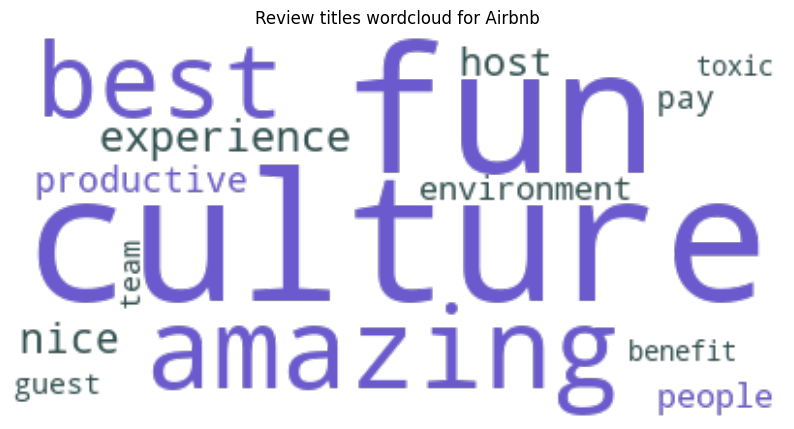

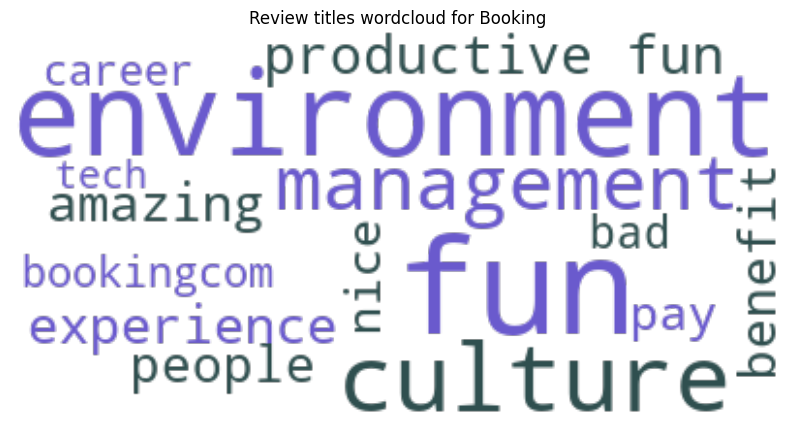

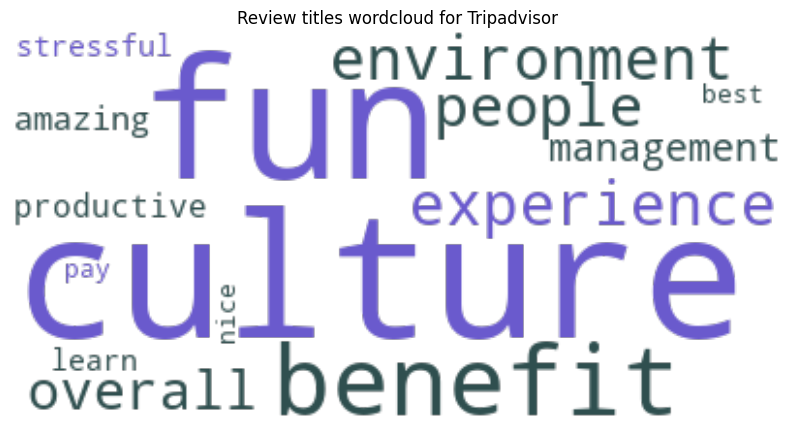

In [116]:
for company in COMPANIES: 
    generate_aggregate_wordcloud(title_data, company, 'titles', 15)

In [117]:
text_data = pd.DataFrame(data=[],columns=['source','company','text'])

for company in COMPANIES: 
    path1 = f'data/glassdoor/{company}/glassdoor_{company}.csv'
    path2 = f'data/indeed/{company}/indeed_{company}.csv'
    reviews1 = pd.read_csv(path1)
    reviews2 = pd.read_csv(path2)
    review_text1 = reviews1.pros.values + reviews1.cons.values 
    review_text2 = reviews2[reviews2.language=='en'].text.values
    wordcloud_text1 = preprocess(review_text1,company)
    wordcloud_text2 = preprocess(review_text2,company)
    row1 = {'source': 'glassdoor', 'company': company, 'text': wordcloud_text1}
    row2 = {'source': 'indeed', 'company': company, 'text': wordcloud_text2}
    text_data = pd.concat([text_data, pd.DataFrame([row1,row2])], ignore_index=True)

In [118]:
text_data

,source,company,text
0,glassdoor,airbnb,culture compensation home optionsthe project m...
1,indeed,airbnb,fun easy kind staff bos care make school highl...
2,glassdoor,booking,nothing complain placenothing think culture ma...
3,indeed,booking,worked bookingcom customer service executive h...
4,glassdoor,tripadvisor,used collaborative environment prioritized tea...
5,indeed,tripadvisor,salary way low amount like dog like robot ther...


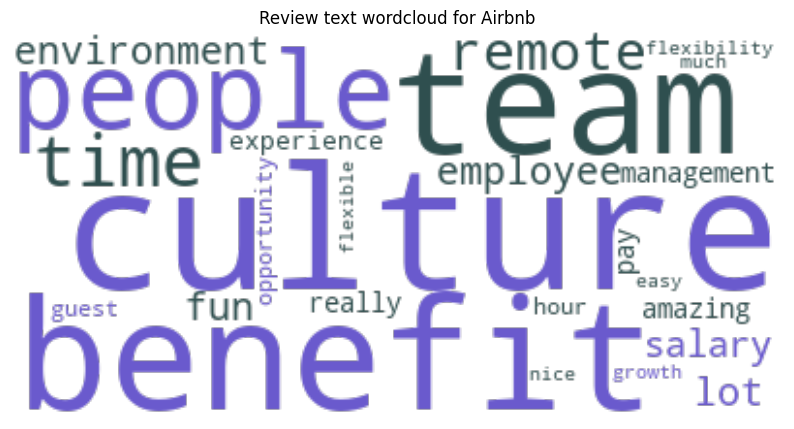

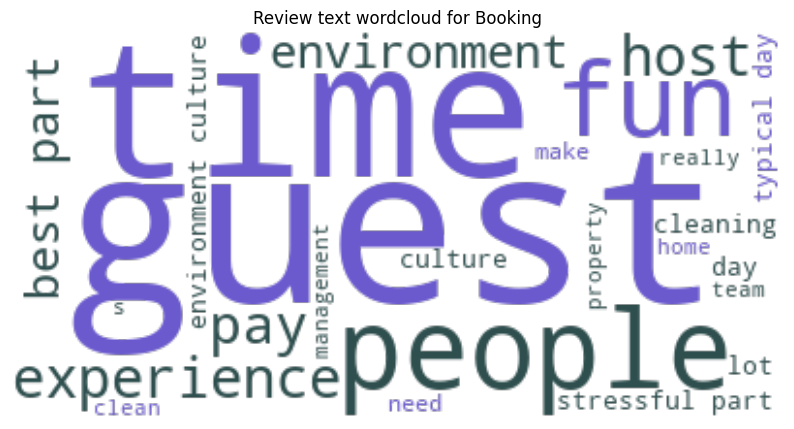

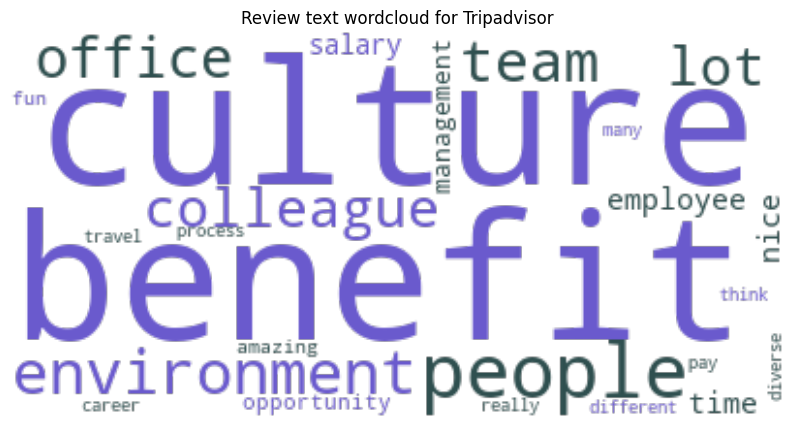

In [119]:
for company in COMPANIES: 
    generate_aggregate_wordcloud(text_data, company, 'text', 25)